The goal today is:

1) Return specific pieces of information (rather than just downloading a whole page)

2) Iterate over multiple pages/queries

3) Save the data to your computer

Compute some statistical summaries and/or visualizations that give some new insights into the data. 


In [ ]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import csv
import json

#consumer key, consumer secret, access key, access secret.
consumer_key="*******"
consumer_secret="*******"
access_key="**************
access_secret="*******"

# Create class to listen to stream
class stream_listener(StreamListener):
    # create csv with columns
    with open('TwitterStreaming.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(["screen name","created_at","tweets", "followers", "friends"])
    pass
    #create function to get specific information and write it to the newly created csv
    def on_data(self, data):
        all_data = json.loads(data)
        tweet = all_data["text"]
        created_at = all_data['created_at']
        screen_name = all_data["user"]["screen_name"]
        followers = all_data["user"]['followers_count']
        friends = all_data["user"]['friends_count']

        with open('TwitterStreaming.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow([screen_name, created_at, tweet, followers, friends])
        pass
        
        return True
    #print error code on error
    def on_error(self, data):
        print(status)
        return True

#set auth
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

# stream
Stream_twitter = Stream(auth, stream_listener())
Stream_twitter.filter(track=["daca", "mexican", "immigrant", "immigration", "uscis", "border patrol"])

After the data has been scraped it's time to import the packages needed for analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
from datetime import datetime


Import the scraped data, and create sentiment analysis columns

In [2]:
df = pd.read_csv('TwitterStreaming.csv')

# Sentiment analyisis
df['polarity'] = df['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
df['subjectivity'] = df['tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)

df.head()

,screen name,created_at,tweets,followers,friends,polarity,subjectivity
0,czarobizarro,Tue Sep 04 02:49:01 +0000 2018,RT @SenFeinstein: Brett Kavanaugh authored a d...,43,271,0.100000,0.400000
1,mizunohopkins,Tue Sep 04 02:49:01 +0000 2018,RT @thetypicalmalay: Immigration officer: Come...,511,597,0.500000,0.500000
2,Joel40rnJoel,Tue Sep 04 02:49:02 +0000 2018,RT @IsraelUSAforevr: Wow. Throwback to when Se...,7628,7621,0.125000,1.000000
3,scvb13,Tue Sep 04 02:49:02 +0000 2018,Mariscos Costa Alegre on #Yelp: Hubby and I tr...,180,501,-0.066667,0.033333
4,Leinster_Lad,Tue Sep 04 02:49:03 +0000 2018,"RT @janeyhasmoved: Chris Bowen: ""I can confirm...",408,610,0.000000,0.000000


Display some statistics

In [3]:
df.describe()

,followers,friends,polarity,subjectivity
count,1495.000000,1495.000000,1495.000000,1495.000000
mean,2523.093645,2137.547157,0.053416,0.315041
std,9141.217625,5768.383844,0.264521,0.283943
min,0.000000,0.000000,-1.000000,0.000000
25%,155.000000,202.500000,0.000000,0.000000
50%,470.000000,604.000000,0.000000,0.300000
75%,1813.000000,2179.500000,0.125000,0.476136
max,154017.000000,121062.000000,1.000000,1.000000


The means of friends and followers is similar, but with a large standard deviation. 

Histogram of polarity:

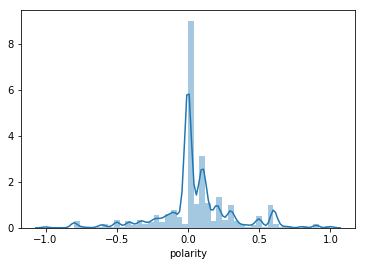

In [4]:
sns.distplot(df.polarity);

The data is close to a normal distribution. Polarity determines whether a variable is positive, negative or neutral.

Histogram of subjectivity:

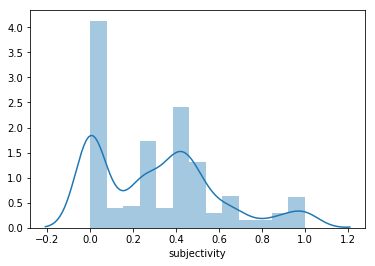

In [5]:
sns.distplot(df.subjectivity);

Subjective determines whether a sentence is objective or subjective

Scatterplot of friends and followers:

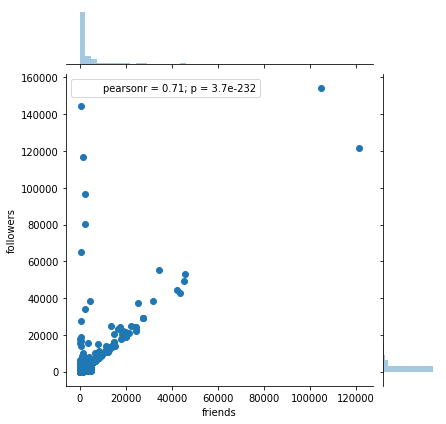

In [6]:
sns.jointplot(df.friends, df.followers);

Friends and followers does appear to be correlated with a p value determining it can reject the null hypothesis.

__In Conclusion..__

Tweepy is a very convenient API that allows you to fetch tweets from twitter in various ways like searching for tweets, streaming tweets live, and more. 

The data scraped used keywords around immigration. 

The tweets were mixed with positive, negative and neutral polarity scores. Neutral was the highest, followed by positive, then negative.

